In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
df = pd.read_csv("../input/insurance/insurance.csv")

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['smoker'] = df['smoker'].map({"yes":1, "no":0})

In [8]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [9]:
from sklearn.preprocessing import LabelEncoder

cat_encoder = LabelEncoder()

df['enc_sex'] = cat_encoder.fit_transform(df['sex'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges,enc_sex
0,19,female,27.900,0,1,southwest,16884.92400,0
1,18,male,33.770,1,0,southeast,1725.55230,1
2,28,male,33.000,3,0,southeast,4449.46200,1
3,33,male,22.705,0,0,northwest,21984.47061,1
4,32,male,28.880,0,0,northwest,3866.85520,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   enc_sex   1338 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 83.8+ KB


In [11]:
from category_encoders import JamesSteinEncoder

jstein_encoder = JamesSteinEncoder()

df['j_stein_region'] = jstein_encoder.fit_transform(df['region'], df['charges'])

In [12]:
X = df.drop(['charges', 'sex', 'region'], axis=1)
y = df.charges

In [13]:
X.shape, y.shape

((1338, 6), (1338,))

In [14]:
X.head(5)

,age,bmi,children,smoker,enc_sex,j_stein_region
0,19,27.900,0,1,0,12493.665012
1,18,33.770,1,0,1,14456.577036
2,28,33.000,3,0,1,14456.577036
3,33,22.705,0,0,1,12547.016330
4,32,28.880,0,0,1,12547.016330


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model2 = RandomForestRegressor(n_estimators=1000)

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

score_rand = mean_absolute_error(y_pred, y_test)
print(score_rand)

2577.6825758631944


In [17]:
from sklearn.metrics import r2_score
score_r2 = r2_score(y_pred, y_test)
print(score_r2)

0.8718719025658718


<function matplotlib.pyplot.show(close=None, block=None)>

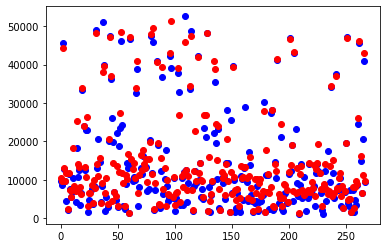

In [18]:
import matplotlib.pyplot as plt

#plt.scatter(y_pred, y_test, color='red')
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.show